In [1]:
file:///home/beams3/RODOLAKIS/.local/share/jupyter/runtime/jpserver-3594367-open.html


I Fri-10:44:52 - ############################################################ startup
I Fri-10:44:52 - logging started
I Fri-10:44:52 - logging level = 10


['29idd', '29idd_retired_2021_12_01']
Number of scans in catalog: 76


In [2]:
scaler.stage_sigs['preset_time']=0.1

In [3]:
x_motor=kappa_motors.m2
y_motor=kappa_motors.m3
z_motor=kappa_motors.m4
kphi_motor=kappa_motors.m1
kap_motor=kappa_motors.m7
kth_motor=kappa_motors.m8
tth_motor=kappa_motors.m9

sd.baseline.append(undulator)
sd.baseline.append(mono)
sd.baseline.append(centroid_m3r)
sd.baseline.append(x_motor)
sd.baseline.append(y_motor)
sd.baseline.append(z_motor)
sd.baseline.append(tth_motor)
sd.baseline.append(kth_motor)
sd.baseline.append(kap_motor)
sd.baseline.append(kphi_motor)

In [4]:
def plot_latest(pos,det):
    """
    pos = x_motor (object)
    det = D3
    
    """
    ds=cat[-1].primary.read()
    #ds.plot.scatter(x=pos.name,y=det.name)
    plt.plot(ds[pos.name], ds[det.name])
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')
    try:
        fname='/home/beams/29IDUSER/Documents/User_Folders/lastfigure.png'
        print(fname)
        plt.savefig(fname)
    except:
        print('error saving')
        pass
    plt.show()
    
def plot_latest_plan(pos,det):
    """
    pos = x_motor (object)
    det = D3
    
    """
    plot_latest(pos,det)
    yield from bps.null()

    
def plot_scatter(pos,det):
    """
    pos= x_motor (object)
    det=D3
    
    """
    ds=cat[-1].primary.read()
    ds.plot.scatter(x=pos.name,y=det.name)
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')


def plot_run(run,pos,det):
    """
    pos= x_motor (object)
    det=D3
    
    """
    ds=cat[run].primary.read()
    #ds.plot.scatter(x=pos.name,y=det.name)
    plt.plot(ds[pos.name], ds[det.name])
    plt.xlabel(pos.name)
    plt.ylabel(det.name)
    plt.grid(color='lightgrey')
    
        
def find_z(pos,det,ds=None):
    """
    ds = cat[-1].primary.read()
    det='D3'
    pos='kappa_motors_m4'
    """
    if ds == None:
        ds = cat[-1].primary.read()
    half_intensity=float((np.max(ds[det.name])-np.min(ds[det.name]))/2)
    
    # array
    y_arr = ds[det.name]
    print("Array is : ", np.array(y_arr))

    # element to which nearest value is to be found
    y = half_intensity
    print("Value to which nearest element is to be found: ", y)

    # calculate the difference array
    difference_array = np.absolute(y_arr-y)

    # find the index of minimum element from the array
    index = difference_array.argmin()
    print("Nearest element to the given values is : ", float(y_arr[index]))
    print("Index of nearest value is : ", int(index))


    x_arr = np.array(ds[pos.name])
    print("Corresponding motor position of nearest value is : ", (x_arr[int(index)]))

        
def make_scan_list(StartStopStepLists):
    """
    Creates and returns a np.array with values based on StartStopStepList
    StartStopStepList is a list of lists defining regions for a table array
              StartStopStepList[[start1,stop1,step1],[start1,stop1,step1],...]
    Automatically removes duplicates and sorts into ascending order
    if you want descending
               myarray=XAS_Table(StartStopStepLists)[::-1]
    """
    table_array=np.array([])
    if type(StartStopStepLists) is not list:
        start=StartStopStepLists[0]
        stop=StartStopStepLists[1]
        step=StartStopStepLists[2]
        j=start
        while j<=stop:
            table_array=np.append(table_array, j)
            j+=step
    else:
        for i in range(0,len(StartStopStepLists)):
            start=StartStopStepLists[i][0]
            stop=StartStopStepLists[i][1]
            step=StartStopStepLists[i][2]
            j=start
            while j<=stop:
                table_array=np.append(table_array, j)
                j+=step
    table_array=np.unique(table_array)#removing duplicate
    table_array=np.sort(table_array) #sort into ascending order    

    return table_array.tolist()

    

In [ ]:
#mono.energy.position or undulator.energy.position
#   gets mono/id energy

#mono.energy.move(800) or undulator.energy.move(0.8)
#   move mono/id energy

#MoveStatus(done=True, pos=monochromator_energy, elapsed=1.2, success=True, settle_time=0.0)

#sts.enum_strs
#   returns ('Not Ready', 'Ready', 'Energy Step Move', 'Energy Fly Scan', 'Error')


#RE(bp.scan([scaler1,TEYcalc,D3calc,D4calc,MCPcalc],mono.energy,779-10,779+10,21))
#   https://nsls-ii.github.io/bluesky/plans.html

#listruns()
#   list data from databroker

# cat[-1].primary.read()['TEYcalc'].plot()
# plt.grid(color='lightgrey')
#   plot data

In [11]:
scaler.select_channels(['D4'])

In [12]:
bec.disable_table()



Transient Scan ID: 58     Time: 2021-12-02 22:18:44
Persistent Unique Scan ID: '59333a29-d804-4b61-95f9-84bd08fc06c9'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5085399746894836             |
|                    mono_energy | 529.99996                      |
|              mono_mirror_pitch | 3.6016241455078126             |
|             mono_grating_pitch | 4.881940283203125              |
|                    centroidM3R | 112.47728590311435             |
|                kappa_motors_m2 | 0.033                          |
|                kappa_motors_m3 | -0.047                         |
|                kappa_motors_m4 | -4000.286                      |
|                kappa_motors_m9 | 3.35                           |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('59333a29-d804-4b61-95f9-84bd08fc06c9',)

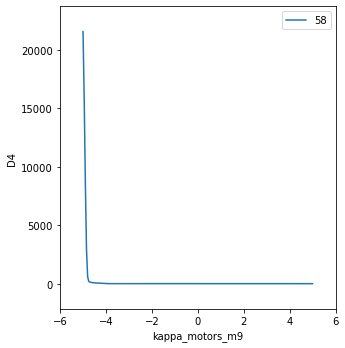

In [17]:
RE(bp.scan([scaler],tth_motor,-5,5,201))

In [18]:
from bluesky.callbacks.fitting import PeakStats

In [19]:
ps = PeakStats('kappa_motors_m9', 'D4')



Transient Scan ID: 59     Time: 2021-12-02 23:39:57
Persistent Unique Scan ID: 'cdd63206-5639-453e-919c-2ae550ed2da7'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5085399746894836             |
|                    mono_energy | 529.9968444                    |
|              mono_mirror_pitch | 3.6016583251953125             |
|             mono_grating_pitch | 4.881936010742187              |
|                    centroidM3R | 116.39511909058102             |
|                kappa_motors_m2 | 0.005                          |
|                kappa_motors_m3 | -0.02                          |
|                kappa_motors_m4 | -4000.311                      |
|                kappa_motors_m9 | -5.1000000000000005            |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('cdd63206-5639-453e-919c-2ae550ed2da7',)

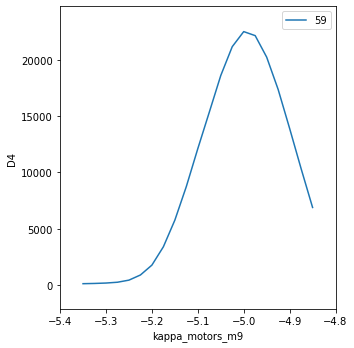

In [20]:
RE(bp.rel_scan([scaler], tth_motor, -0.25, 0.25, 21), [ps])



Transient Scan ID: 60     Time: 2021-12-02 23:40:56
Persistent Unique Scan ID: '5f867aae-0267-42eb-9474-9139bc77232a'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5089083909988403             |
|                    mono_energy | 530.0062187                    |
|              mono_mirror_pitch | 3.601678466796875              |
|             mono_grating_pitch | 4.881917700195313              |
|                    centroidM3R | 116.45838819827259             |
|                kappa_motors_m2 | 0.006                          |
|                kappa_motors_m3 | -0.02                          |
|                kappa_motors_m4 | -4000.313                      |
|                kappa_motors_m9 | -5.0                           |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('5f867aae-0267-42eb-9474-9139bc77232a',)

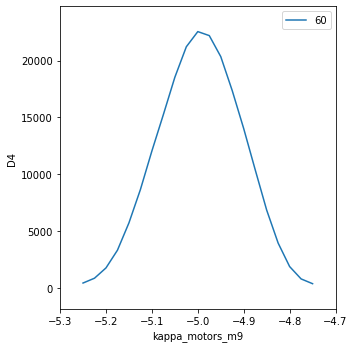

In [21]:
RE(bp.rel_scan([scaler], tth_motor, -0.25, 0.25, 21), [ps])



Transient Scan ID: 61     Time: 2021-12-02 23:42:50
Persistent Unique Scan ID: 'dabfc0f2-28c0-419c-b524-5bbf261f37f7'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5089083909988403             |
|                    mono_energy | 530.0016194                    |
|              mono_mirror_pitch | 3.6016351318359376             |
|             mono_grating_pitch | 4.881929296875                 |
|                    centroidM3R | 116.2878306162484              |
|                kappa_motors_m2 | 0.001                          |
|                kappa_motors_m3 | -0.018000000000000002          |
|                kappa_motors_m4 | -4000.31                       |
|                kappa_motors_m9 | -5.0                           |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('dabfc0f2-28c0-419c-b524-5bbf261f37f7',)

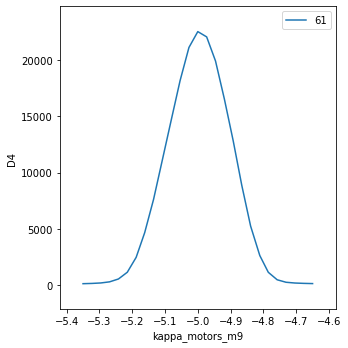

In [22]:
RE(bp.rel_scan([scaler], tth_motor, -0.35, 0.35, 27), [ps])

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fdf0a17c1c0>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fdf0a1843d0>,
 'legend': <matplotlib.legend.Legend at 0x7fdf0a184280>}

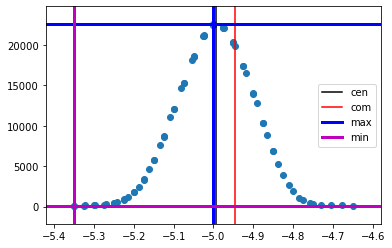

In [24]:
plot_peak_stats(ps)

In [25]:
ps.stats

Stats(min=(-5.3500000000000005, 121.0), max=(-5.0, 22551.0), com=-4.946955073996644, cen=-4.9938673431106855, crossings=array([-5.10573892, -4.88201877, -5.10526975, -4.88146611, -5.1064894 ,
       -4.88222109]), fwhm=0.22351783082283116, lin_bkg=None)

In [26]:
tth_motor.move(-4.994)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=0.2, success=True, settle_time=0.0)

In [28]:
RE(tth0_set())

()



Transient Scan ID: 62     Time: 2021-12-02 23:50:03
Persistent Unique Scan ID: 'c89fe8b3-ae40-4a6b-9123-5135fc33722c'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5088346600532532             |
|                    mono_energy | 530.0050812                    |
|              mono_mirror_pitch | 3.601593017578125              |
|             mono_grating_pitch | 4.8819463867187505             |
|                    centroidM3R | 116.40227242287602             |
|                kappa_motors_m2 | -0.003                         |
|                kappa_motors_m3 | -0.015                         |
|                kappa_motors_m4 | -4000.315                      |
|                kappa_motors_m9 | 0.0                            |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('c89fe8b3-ae40-4a6b-9123-5135fc33722c',)

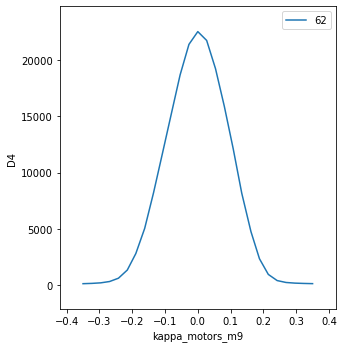

In [29]:
RE(bp.rel_scan([scaler], tth_motor, -0.35, 0.35, 27), [ps])

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fdf0a1d10d0>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fdf0a1d1c40>,
 'legend': <matplotlib.legend.Legend at 0x7fdf0a1d1d60>}

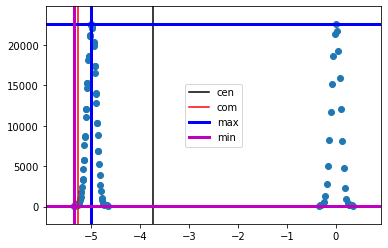

In [30]:
plot_peak_stats(ps)

In [34]:
ps.reset()



Transient Scan ID: 63     Time: 2021-12-02 23:51:24
Persistent Unique Scan ID: '9229b5b1-b443-44cd-b968-8c84a63b275f'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5086135864257812             |
|                    mono_energy | 530.002603                     |
|              mono_mirror_pitch | 3.6016766357421877             |
|             mono_grating_pitch | 4.881921362304688              |
|                    centroidM3R | 116.5543387825774              |
|                kappa_motors_m2 | -0.003                         |
|                kappa_motors_m3 | -0.015                         |
|                kappa_motors_m4 | -4000.318                      |
|                kappa_motors_m9 | 0.0                            |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('9229b5b1-b443-44cd-b968-8c84a63b275f',)

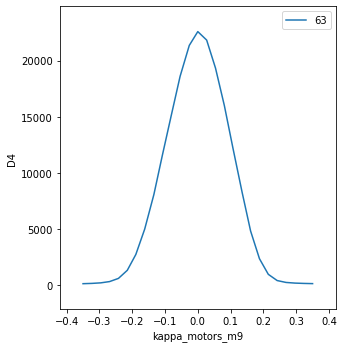

In [35]:
RE(bp.rel_scan([scaler], tth_motor, -0.35, 0.35, 27), [ps])

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fdf0a3e0a00>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fdf0a3dbe20>,
 'legend': <matplotlib.legend.Legend at 0x7fdf0a3dbfd0>}

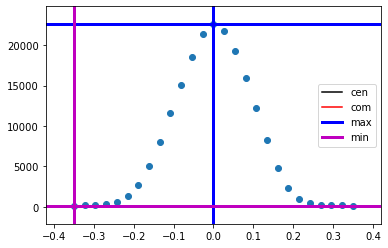

In [36]:
plot_peak_stats(ps)

In [37]:
ps.stats

Stats(min=(-0.35000000000000003, 123.0), max=(0.0, 22582.0), com=-0.00012524226425181598, cen=0.0017666040695809987, crossings=array([-0.10963887,  0.11317208]), fwhm=0.22281095429738623, lin_bkg=None)

In [40]:
ps.reset()



Transient Scan ID: 64     Time: 2021-12-03 00:03:38
Persistent Unique Scan ID: '43d1ef04-55a2-469f-b080-29af8ef32a94'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5086135864257812             |
|                    mono_energy | 530.0080705                    |
|              mono_mirror_pitch | 3.601619873046875              |
|             mono_grating_pitch | 4.881918920898437              |
|                    centroidM3R | 111.78868039165285             |
|                kappa_motors_m2 | -0.012                         |
|                kappa_motors_m3 | -0.012                         |
|                kappa_motors_m4 | -4000.32                       |
|                kappa_motors_m9 | -0.1                           |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('43d1ef04-55a2-469f-b080-29af8ef32a94',)

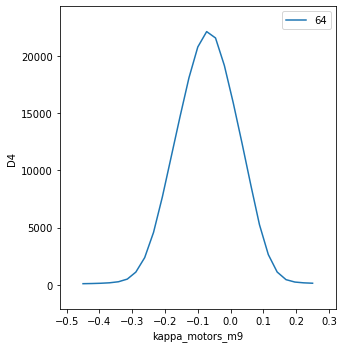

In [41]:
RE(bp.rel_scan([scaler], tth_motor, -0.35, 0.35, 27), [ps])

{'color': 'k'} cen
{'color': 'r'} com
{'color': 'b'} max
{'color': 'm'} min


{'points': <matplotlib.lines.Line2D at 0x7fdf0a5e0e80>,
 'vlines': [<matplotlib.lines.Line2D at 0x7fdf0a5da1f0>,
 'legend': <matplotlib.legend.Legend at 0x7fdf0a5da460>}

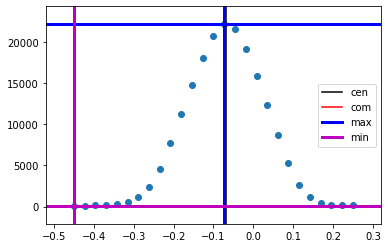

In [42]:
plot_peak_stats(ps)

In [43]:
ps.stats

Stats(min=(-0.45, 106.0), max=(-0.073, 22139.0), com=-0.07043220935140457, cen=-0.06879962288855819, crossings=array([-0.18170304,  0.0441038 ]), fwhm=0.22580684414889388, lin_bkg=None)

In [44]:
tth_motor.move(ps.stats.cen)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=0.4, success=True, settle_time=0.0)

In [47]:
RE(tth0_set())

()

In [48]:
RE(set_detector_plan('d3'))

()

In [49]:
tth_motor.move(2)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=18.8, success=True, settle_time=0.0)

In [34]:
ps.reset()

In [50]:
scaler.select_channels(['D3'])



Transient Scan ID: 65     Time: 2021-12-03 00:07:48
Persistent Unique Scan ID: 'a1114aa3-28c7-43a7-b07e-88d453c8a24e'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5088346600532532             |
|                    mono_energy | 529.9987566                    |
|              mono_mirror_pitch | 3.60163818359375               |
|             mono_grating_pitch | 4.8819244140625                |
|                    centroidM3R | 112.22665438571632             |
|                kappa_motors_m2 | -0.014                         |
|                kappa_motors_m3 | -0.011                         |
|                kappa_motors_m4 | -4000.32                       |
|                kappa_motors_m9 | 2.0                            |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.755                        |
|                kappa_motors_m1

('a1114aa3-28c7-43a7-b07e-88d453c8a24e',)

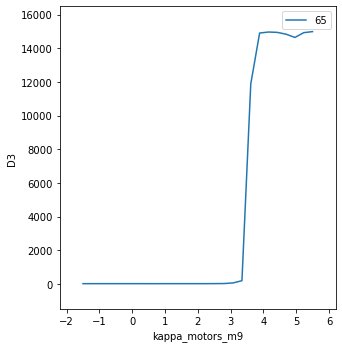

In [51]:
RE(bp.rel_scan([scaler], tth_motor, -3.5, 3.5, 27), [ps])

In [52]:
tth_motor.move(5)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=2.6, success=True, settle_time=0.0)

In [53]:
ps.reset()



Transient Scan ID: 66     Time: 2021-12-03 00:09:42
Persistent Unique Scan ID: '725d8f40-6979-4f0d-ae37-f6c4fc8739b0'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5089083909988403             |
|                    mono_energy | 529.997828                     |
|              mono_mirror_pitch | 3.6016717529296876             |
|             mono_grating_pitch | 4.881938452148438              |
|                    centroidM3R | 111.35300477096995             |
|                kappa_motors_m2 | -0.014                         |
|                kappa_motors_m3 | -0.008                         |
|                kappa_motors_m4 | -4000.32                       |
|                kappa_motors_m9 | 5.0                            |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('725d8f40-6979-4f0d-ae37-f6c4fc8739b0',)

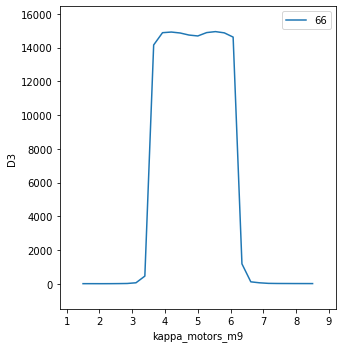

In [54]:
RE(bp.rel_scan([scaler], tth_motor, -3.5, 3.5, 27), [ps])

# New detectors offsets

In [59]:
(3.53+6.21)/2

4.87

In [62]:
29.123-4.87

24.253

In [65]:
18.7316-4.87

13.8616

In [63]:
-4.036-4.87

-8.905999999999999

# Align sample



Transient Scan ID: 67     Time: 2021-12-03 00:30:09
Persistent Unique Scan ID: '1b5d6ed3-c1d0-46c7-a092-4a6df773c9eb'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5086872577667236             |
|                    mono_energy | 529.9980752                    |
|              mono_mirror_pitch | 3.601611328125                 |
|             mono_grating_pitch | 4.881948217773438              |
|                    centroidM3R | 111.5563635513363              |
|                kappa_motors_m2 | -0.032                         |
|                kappa_motors_m3 | 0.028                          |
|                kappa_motors_m4 | 0.029                          |
|                kappa_motors_m9 | 4.870000000000001              |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('1b5d6ed3-c1d0-46c7-a092-4a6df773c9eb',)

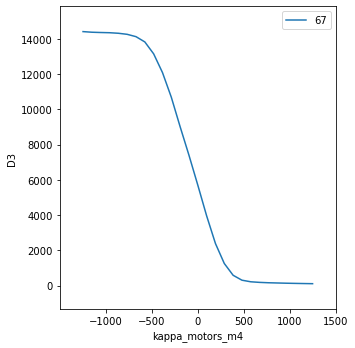

In [66]:
RE(bp.rel_scan([scaler], z_motor, -1250, 1250, 27))

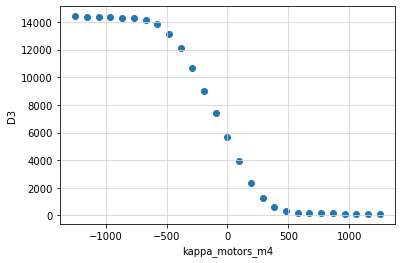

In [67]:
plot_scatter(z_motor,D3)

In [70]:
find_z(z_motor,D3)

Array is :  [14413. 14378. 14362. 14350. 14319. 14259. 14126. 13827. 13150. 12087.
 10688.  9011.  7394.  5700.  3957.  2384.  1253.   584.   305.   215.
   181.   160.   147.   134.   124.   115.   107.]
Value to which nearest element is to be found:  7153.0
Nearest element to the given values is :  7394.0
Index of nearest value is :  12
Corresponding motor position of nearest value is :  -96.12


In [71]:
z_motor.move(-96)

MoveStatus(done=True, pos=kappa_motors_m4, elapsed=0.6, success=True, settle_time=0.0)

In [76]:
ps.reset()

In [75]:
ps.stats

Stats(min=(-0.45, 106.0), max=(-0.073, 22139.0), com=-0.07043220935140457, cen=-0.06879962288855819, crossings=array([-0.18170304,  0.0441038 ]), fwhm=0.22580684414889388, lin_bkg=None)



Transient Scan ID: 68     Time: 2021-12-03 00:40:12
Persistent Unique Scan ID: 'b9b28c29-6a4e-4036-9d63-a26f17d4b660'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5087609887123108             |
|                    mono_energy | 529.9982126                    |
|              mono_mirror_pitch | 3.601649169921875              |
|             mono_grating_pitch | 4.881926245117188              |
|                    centroidM3R | 112.07619047619048             |
|                kappa_motors_m2 | -0.036000000000000004          |
|                kappa_motors_m3 | 0.032                          |
|                kappa_motors_m4 | -96.071                        |
|                kappa_motors_m9 | 4.870000000000001              |
|                kappa_motors_m8 | 57.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('b9b28c29-6a4e-4036-9d63-a26f17d4b660',)

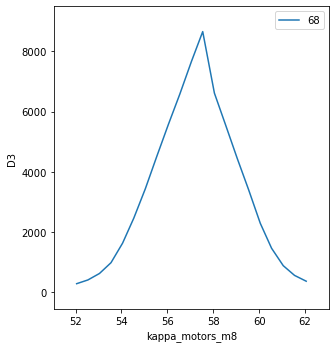

In [77]:
RE(bp.rel_scan([scaler], kth_motor, -5, 5, 21))

In [79]:
kth_motor.move(57.045+30)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=11.5, success=True, settle_time=0.0)

In [80]:
tth_motor.move(4.87+50)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=34.1, success=True, settle_time=0.0)

In [81]:
scaler.select_channels(['TEY','D3','mesh'])



Transient Scan ID: 69     Time: 2021-12-03 00:47:12
Persistent Unique Scan ID: 'c42a0a39-4738-4e89-ac4e-3ed8e72e6b8f'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5088346600532532             |
|                    mono_energy | 529.99996                      |
|              mono_mirror_pitch | 3.6016796875                   |
|             mono_grating_pitch | 4.881950048828125              |
|                    centroidM3R | 112.5048262998368              |
|                kappa_motors_m2 | -0.021                         |
|                kappa_motors_m3 | 0.028                          |
|                kappa_motors_m4 | -96.06400000000001             |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('c42a0a39-4738-4e89-ac4e-3ed8e72e6b8f',)

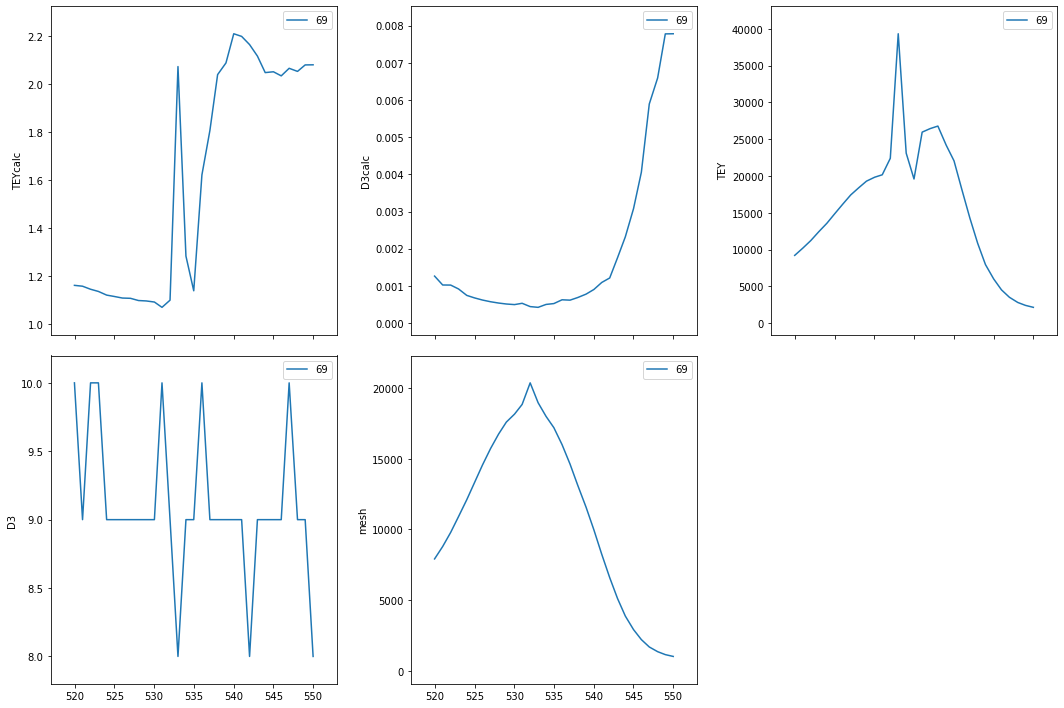

In [83]:
RE(bp.scan([scaler,TEYcalc,D3calc],mono.energy,520,550,31))


In [84]:
scaler.select_channels(['TEY','mesh'])

In [85]:
scaler.stage_sigs

OrderedDict([('preset_time', 0.1)])

In [87]:
scaler.stage_sigs['preset_time']=1

In [88]:
scaler.stage_sigs

OrderedDict([('preset_time', 1)])



Transient Scan ID: 70     Time: 2021-12-03 00:53:50
Persistent Unique Scan ID: 'd45c450a-54c3-438a-8bec-3f317c48b912'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5088346600532532             |
|                    mono_energy | 550.0010717                    |
|              mono_mirror_pitch | 3.5353912353515624             |
|             mono_grating_pitch | 4.79219296875                  |
|                    centroidM3R | 111.5                          |
|                kappa_motors_m2 | -0.028                         |
|                kappa_motors_m3 | 0.03                           |
|                kappa_motors_m4 | -96.06                         |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('d45c450a-54c3-438a-8bec-3f317c48b912',)

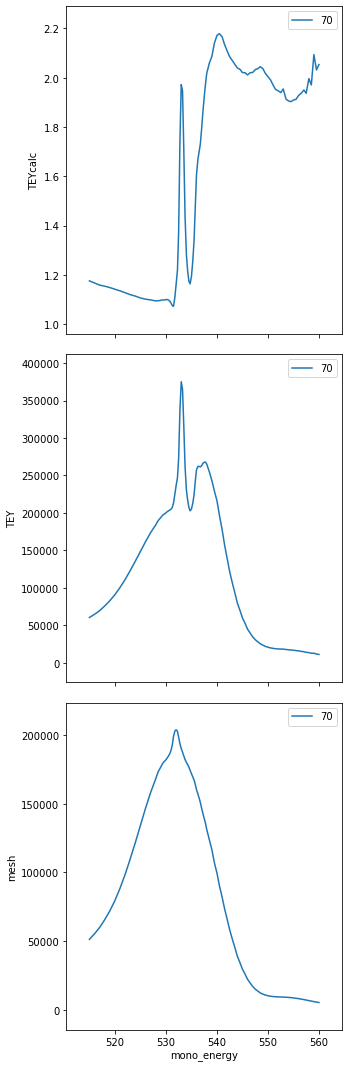

In [91]:
E_OK=make_scan_list([[515,528,1],[528,538,0.25],[538,560,0.5]])
RE(bp.list_scan([scaler,TEYcalc],mono.energy,E_OK))


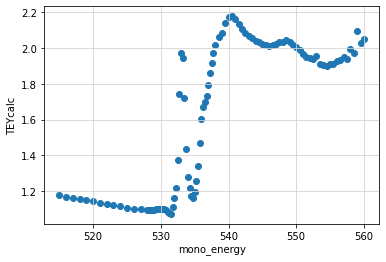

In [93]:
plot_scatter(mono.energy,TEYcalc)

In [98]:
undulator.energy.move(0.550)
mono.energy.move(540)

KeyboardInterrupt: 

In [ ]:
RE(bps.sleep(10))
RE(align_m3r_plan())
RE(bps.sleep(30))



Transient Scan ID: 71     Time: 2021-12-03 01:10:51
Persistent Unique Scan ID: 'ef22c41a-905d-4865-b94a-8dd5c20904f8'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5188480615615845             |
|                    mono_energy | 540.0077134                    |
|              mono_mirror_pitch | 3.56807373046875               |
|             mono_grating_pitch | 4.83645810546875               |
|                    centroidM3R | 111.58187964841109             |
|                kappa_motors_m2 | -0.037                         |
|                kappa_motors_m3 | 0.04                           |
|                kappa_motors_m4 | -96.059                        |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('ef22c41a-905d-4865-b94a-8dd5c20904f8',)

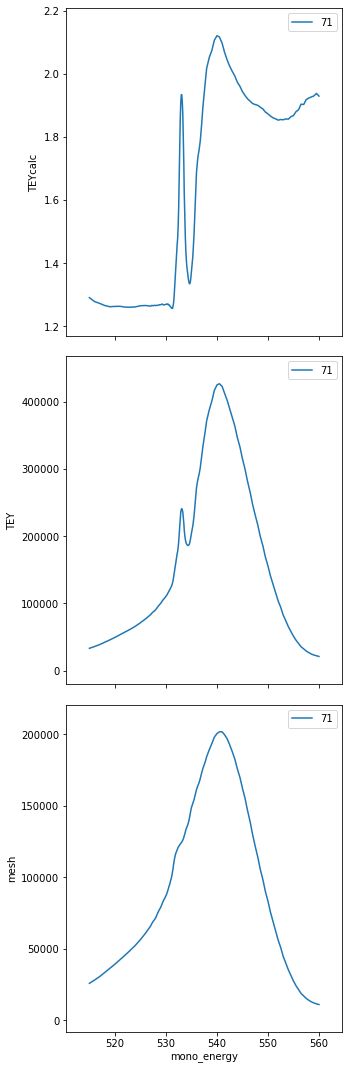

In [99]:
RE(bp.list_scan([scaler,TEYcalc],mono.energy,E_OK))

In [100]:
undulator.energy.move(0.709)
mono.energy.move(697)

MoveStatus(done=True, pos=mono_energy, elapsed=6.1, success=True, settle_time=0.0)

In [101]:
RE(bps.sleep(10))
RE(align_m3r_plan())
RE(bps.sleep(30))

()



Transient Scan ID: 72     Time: 2021-12-03 01:20:29
Persistent Unique Scan ID: 'e1c46f96-8b44-4675-8b36-7c575cc40e9c'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6820778250694275             |
|                    mono_energy | 697.0041784                    |
|              mono_mirror_pitch | 3.139514770507813              |
|             mono_grating_pitch | 4.256139501953125              |
|                    centroidM3R | 111.77524989517252             |
|                kappa_motors_m2 | -0.046                         |
|                kappa_motors_m3 | 0.047                          |
|                kappa_motors_m4 | -96.059                        |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('e1c46f96-8b44-4675-8b36-7c575cc40e9c',)

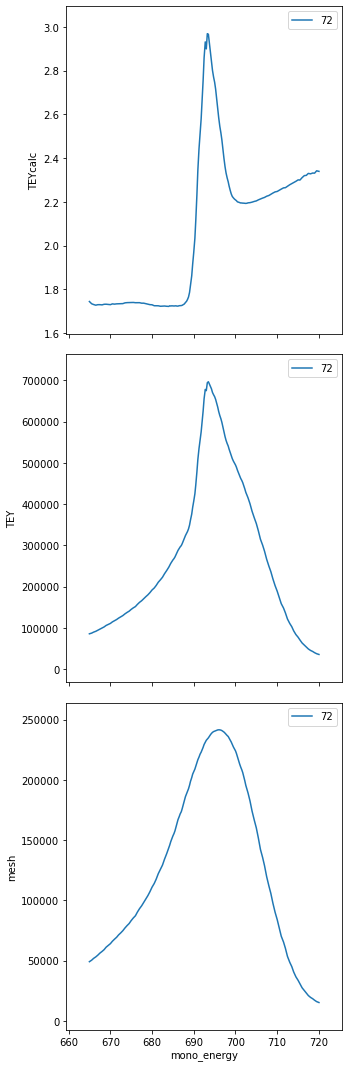

In [102]:
RE(bp.list_scan([scaler,TEYcalc],mono.energy,E_FK))

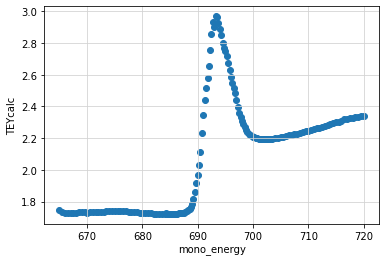

In [104]:
plot_scatter(mono.energy,TEYcalc)

In [113]:
E_FK= make_scan_list([[665,684,1],[684,687,0.5],[687,697,0.1],[697,703,0.5],[703,720,1]])
E_OK=make_scan_list([[515,527,1],[527,530,0.25],[530,535,0.1],[535,538,0.25],[538,560,0.5]])


def myplan_OK():
#    yield from bps.mv(mono.energy,540)
#    yield from bps.mv(undulator.energy,1.8926)
    for x in [0,200]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc],mono.energy,E_OK)
        #yield from plot_latest(mono.energy,TEYcalc)

def myplan_FK():
    # yield from bps.mv(mono.energy,690)
    # yield from bps.mv(undulator.energy,0.7089)
    for x in [0,400]:
        yield from bps.mv(x_motor,x)
        yield from bp.list_scan([scaler,TEYcalc],mono.energy,E_FK)  
        #yield from plot_latest(mono.energy,TEYcalc)
        
def align_m3r_plan():
    yield from bps.mv(align_m3r,1)

In [106]:
undulator.energy.move(0.550)
mono.energy.move(540)

MoveStatus(done=True, pos=mono_energy, elapsed=7.7, success=True, settle_time=0.0)

In [107]:
RE(bps.sleep(10))
RE(align_m3r_plan())
RE(bps.sleep(30))

()



Transient Scan ID: 73     Time: 2021-12-03 01:36:04
Persistent Unique Scan ID: 'b24c0ded-1bd9-4131-b26e-266e2e578108'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.5152292251586914             |
|                    mono_energy | 539.9928883                    |
|              mono_mirror_pitch | 3.5680841064453124             |
|             mono_grating_pitch | 4.836423315429688              |
|                    centroidM3R | 111.4542691282358              |
|                kappa_motors_m2 | -0.005                         |
|                kappa_motors_m3 | 0.057                          |
|                kappa_motors_m4 | -96.059                        |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

('b24c0ded-1bd9-4131-b26e-266e2e578108',
 'ccb40993-c79b-40e0-9d05-8c38ad3e4920')

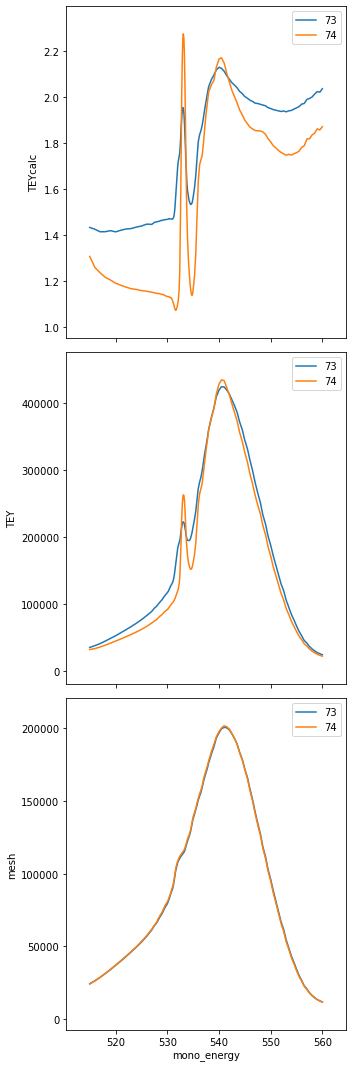

In [109]:
RE(myplan_OK())

In [110]:
undulator.energy.move(0.709)
mono.energy.move(697)

MoveStatus(done=True, pos=mono_energy, elapsed=6.1, success=True, settle_time=0.0)

In [111]:
RE(bps.sleep(10))
RE(align_m3r_plan())
RE(bps.sleep(30))

()



Transient Scan ID: 75     Time: 2021-12-03 09:00:15
Persistent Unique Scan ID: '3ee21423-bfb1-4a11-b476-48fc6c4645fb'
Start-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.682300329208374              |
|                    mono_energy | 696.9962432                    |
|              mono_mirror_pitch | 3.139542236328125              |
|             mono_grating_pitch | 4.256149877929688              |
|                    centroidM3R | 121.63858898115662             |
|                kappa_motors_m2 | -0.003                         |
|                kappa_motors_m3 | 0.197                          |
|                kappa_motors_m4 | -96.136                        |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1

RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


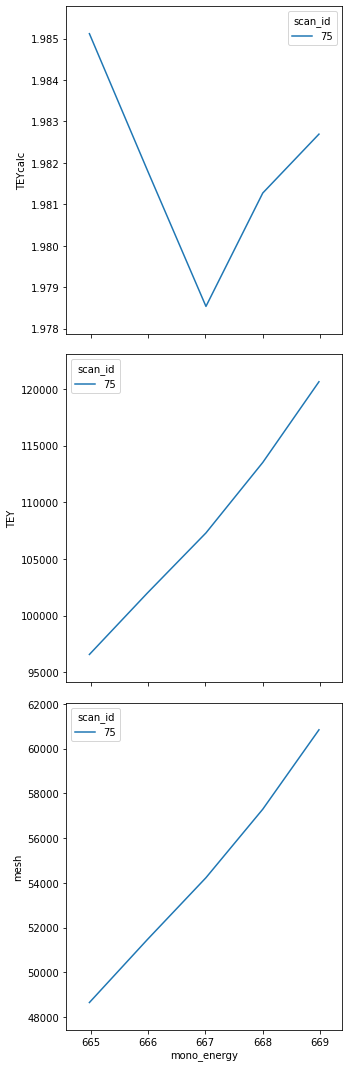

In [114]:
RE(myplan_FK())

End-of-run baseline readings:
+--------------------------------+--------------------------------+
|      undulator_energy_readback | 0.6819665431976318             |
|                    mono_energy | 720.006289                     |
|              mono_mirror_pitch | 3.0888800048828124             |
|             mono_grating_pitch | 4.187531103515625              |
|                    centroidM3R | 109.0                          |
|                kappa_motors_m2 | -0.005                         |
|                kappa_motors_m3 | 0.201                          |
|                kappa_motors_m4 | -96.137                        |
|                kappa_motors_m9 | 54.870000000000005             |
|                kappa_motors_m8 | 87.04514238179206              |
|                kappa_motors_m7 | 134.75600000000003             |
|                kappa_motors_m1 | 57.03726604000002              |
+--------------------------------+--------------------------------+





Transient Sca

('3ee21423-bfb1-4a11-b476-48fc6c4645fb',
 '70e7c43f-3e2f-4cb6-b750-fffb8dc506ce')

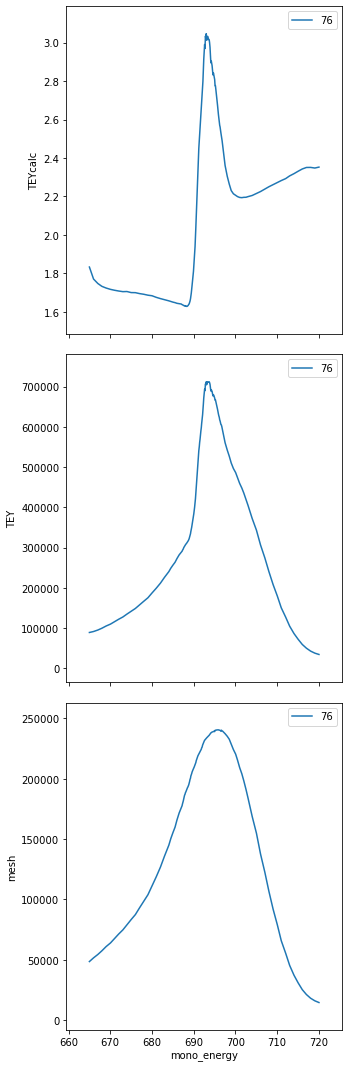

In [115]:
RE.resume()

In [5]:
scaler.select_channels(['D4'])

In [12]:
RE(set_detector_plan('d4'))

()

In [9]:
kth_motor.move(57.045+10)

MoveStatus(done=True, pos=kappa_motors_m8, elapsed=3.9, success=True, settle_time=0.0)

In [11]:
tth_motor.move(20)

MoveStatus(done=True, pos=kappa_motors_m9, elapsed=0.0, success=True, settle_time=0.0)